# How to generate the skymap file

In [1]:
from skymap.skymap import romantessellation, tiles2asdf

NSIDE = 13
theta, phi, ramin, ramax, decmin, decmax, vertices = romantessellation(NSIDE)
tiles2asdf(theta, phi, ramin, ramax, decmin, decmax,outfile='skymap.asdf')


0...:...:...:...:...:...:...:...:...:...
1000...:...:...:...:...:...:...:...:...:...
2000...:...:...:...:...:...:...:...:...:...
3000...:...:...:...:...:...:...:...:...:...
4000..

1

# How to read the skymap file

The file contains extensions with the number of the sky tile. For each extension, which can be read as tiles[n] with n the number of the sky tile, there is a different number of records containing the metadata of each sky cell. 

## Structure of file

In [6]:
import asdf
skymap = asdf.open("skymap.asdf")
skymap.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 4.1.0
├─history (dict)
│ └─extensions (list)
│   ├─[0] (ExtensionMetadata) ...
│   ├─[1] (ExtensionMetadata) ...
│   └─[2] (ExtensionMetadata) ...
└─roman (SkycellsRef) # Skycells Reference File Schema
  ├─meta (dict) # Metadata for Skycells definitions reference file
  │ ├─author (str): Dario Fadda # Author
  │ ├─description (str): Skycells covering the celestial sphere # Description
  │ ├─instrument (dict) ...
  │ ├─nxy_skycell (int): 5000 # Number of pixels in both x and y dimensions
  │ ├─origin (Origin): STSCI # Institution / Organization Name
  │ ├─pedigree (str): GROUND # Pedigree
  │ └─5 not shown
  ├─projection_regions (NDArrayType) # Information about each projection region ...
  ├─skycells (NDArrayType) # Information about all skycells ...
  └─datamodel_name (str): RomanSkycellsRefModel
Some nodes not

In [7]:
print(skymap['roman']['projection_regions'])
print(skymap['roman']['skycells'])

<array (unloaded) shape: [4058] dtype: [('index', '<i4'), ('ra_tangent', '<f8'), ('dec_tangent', '<f8'), ('ra_min', '<f8'), ('ra_max', '<f8'), ('dec_min', '<f8'), ('dec_max', '<f8'), ('orientat', '<f4'), ('x_tangent', '<f8'), ('y_tangent', '<f8'), ('nx', '<i4'), ('ny', '<i4'), ('skycell_start', '<i4'), ('skycell_end', '<i4')]>
<array (unloaded) shape: [8045034] dtype: [('name', '<U16'), ('ra_center', '<f8'), ('dec_center', '<f8'), ('orientat', '<f4'), ('x_tangent', '<f8'), ('y_tangent', '<f8'), ('ra_corn1', '<f8'), ('dec_corn1', '<f8'), ('ra_corn2', '<f8'), ('dec_corn2', '<f8'), ('ra_corn3', '<f8'), ('dec_corn3', '<f8'), ('ra_corn4', '<f8'), ('dec_corn4', '<f8')]>


## Fields of sky cell metadata

In [8]:
print('Meta: ')
print(skymap['roman']['meta'])
print('Projection regions: ')
print(skymap['roman']['projection_regions'].dtype)
print('Skycells: ')
print(skymap['roman']['skycells'].dtype)

Meta: 
{'author': 'Dario Fadda', 'description': 'Skycells covering the celestial sphere', 'instrument': {'name': 'WFI'}, 'nxy_skycell': 5000, 'origin': 'STSCI', 'pedigree': 'GROUND', 'pixel_scale': 0.055, 'reftype': 'SKYCELLS', 'skycell_border_pixels': 100, 'telescope': 'ROMAN', 'useafter': <Time object: scale='utc' format='datetime' value=2025-01-01 00:00:00>}
Projection regions: 
[('index', '<i4'), ('ra_tangent', '<f8'), ('dec_tangent', '<f8'), ('ra_min', '<f8'), ('ra_max', '<f8'), ('dec_min', '<f8'), ('dec_max', '<f8'), ('orientat', '<f4'), ('x_tangent', '<f8'), ('y_tangent', '<f8'), ('nx', '<i4'), ('ny', '<i4'), ('skycell_start', '<i4'), ('skycell_end', '<i4')]
Skycells: 
[('name', '<U16'), ('ra_center', '<f8'), ('dec_center', '<f8'), ('orientat', '<f4'), ('x_tangent', '<f8'), ('y_tangent', '<f8'), ('ra_corn1', '<f8'), ('dec_corn1', '<f8'), ('ra_corn2', '<f8'), ('dec_corn2', '<f8'), ('ra_corn3', '<f8'), ('dec_corn3', '<f8'), ('ra_corn4', '<f8'), ('dec_corn4', '<f8')]


## Number of sky cells 

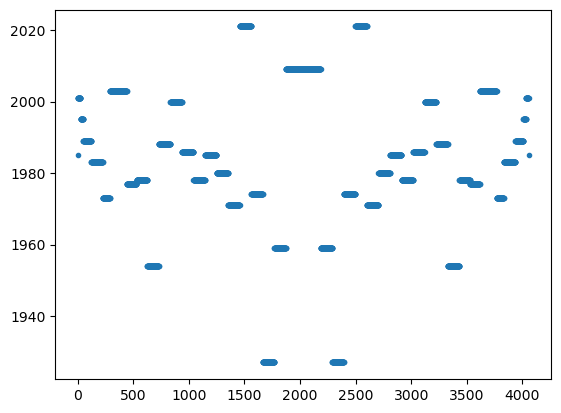

Median number of sky cells:  1983.0


In [9]:
# Number of sky cells for each sky tile
import matplotlib.pyplot as plt
import numpy as np
tiles = skymap['roman']['projection_regions']
ntiles = len(tiles)
lentiles = [tiles[i]['skycell_end']-tiles[i]['skycell_start'] for i in range(ntiles)]
plt.plot(lentiles,'.')
plt.show()
print('Median number of sky cells: ', np.median(lentiles))

## Reading information, field by field

In [3]:
import asdf
skymap = asdf.open("skymap.asdf")
nskytile = 10
nskycell = 100

skytiles = skymap['roman']['projection_regions']
skycells = skymap['roman']['skycells']
tile = skytiles[nskytile]
cells = skycells[tile['skycell_start']:tile['skycell_end']]
cell = cells[nskycell]
print('Tile ', nskytile)
for field in tile.dtype.names:
    print(' {0:25s}  {1:s}'.format(field,  str(tile[field])))
print('\nCell ', nskycell)
for field in cell.dtype.names:
    print(' {0:25s}  {1:s}'.format(field,  str(cell[field])))

Tile  10
 index                      10
 ra_tangent                 22.5
 dec_tangent                82.7980584505
 ra_min                     11.25
 ra_max                     33.75
 dec_min                    80.9942307505
 dec_max                    84.6001008073
 orientat                   0.0
 x_tangent                  115264.5
 y_tangent                  118009.5
 nx                         230530
 ny                         236020
 skycell_start              19994
 skycell_end                21995

Cell  100
 name                       022p83x28y33
 ra_center                  14.4218941031
 dec_center                 81.0982166837
 orientat                   8.078106
 x_tangent                  84099.5
 y_tangent                  108099.5
 ra_corn1                   14.2130697899
 dec_corn1                  81.0550782268
 ra_corn2                   14.699499724
 dec_corn2                  81.0656305876
 ra_corn3                   14.6327470644
 dec_corn3                  81.141

## Plot a tile

Dec max,min is:  90.0 88.2006257455


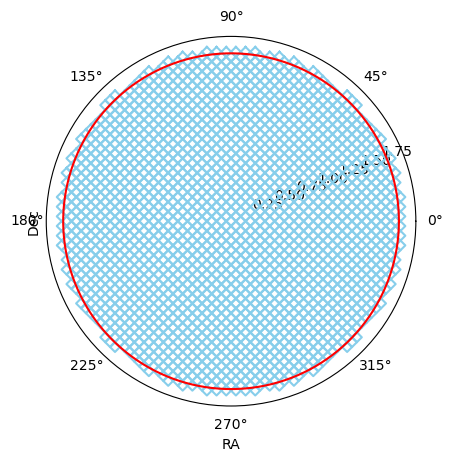

Dec max,min is:  -88.2006257455 -90.0


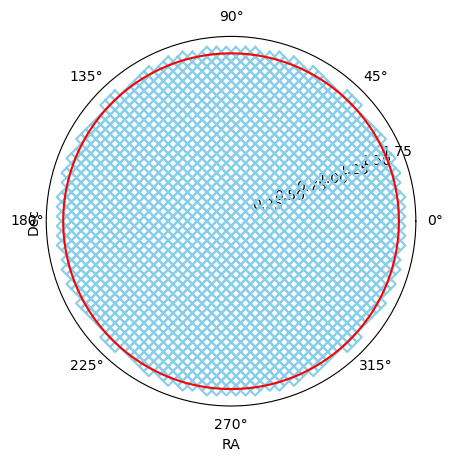

c0 is zero


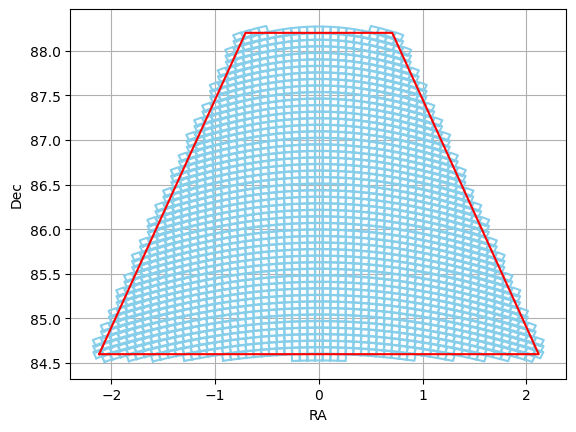

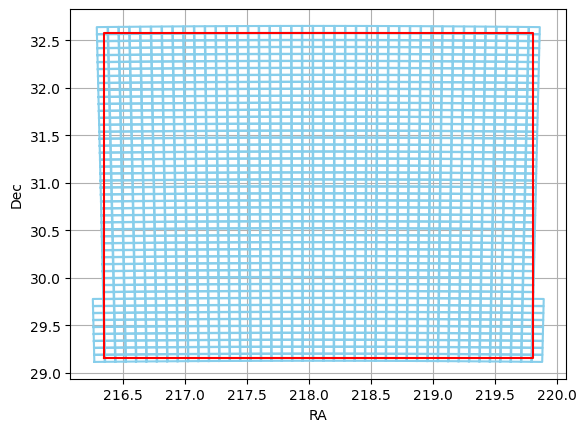

1

In [4]:
import asdf
from skymap.skymap import plotskytile
skymap = asdf.open("skymap.asdf")

plotskytile(skymap, 0)
plotskytile(skymap,len(skymap['roman']['projection_regions'])-1)
plotskytile(skymap, 1, distortion=True)
plotskytile(skymap, 1000)

### without Declination distortion

c0 is zero


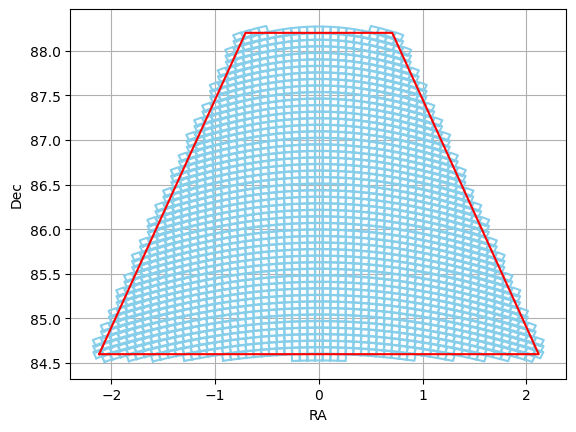

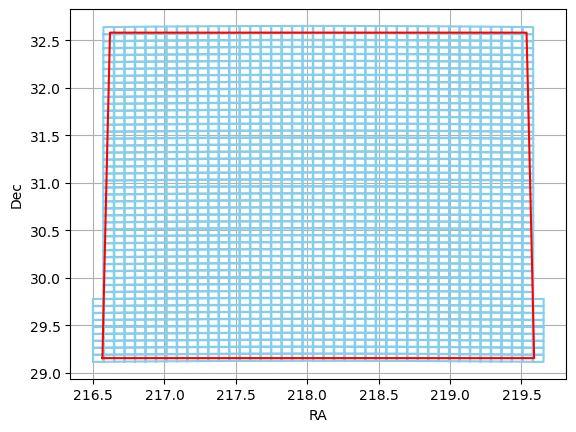

1

In [5]:
import asdf
from skymap.skymap import plotskytile
skymap = asdf.open("skymap.asdf")

plotskytile(skymap, 1, distortion=True)
plotskytile(skymap, 1000, distortion=True)

## Astrometry check

This section shows how to transform the corners of a skycell into coordinates using the WCS created from the metadata.
In particular the WCS is used to transform the equatorial coordinates of the corners of the skycells into xy coordinates in the system of the skycell. 

In [3]:
# Reading the file
import asdf
import numpy as np
skymap = asdf.open("skymap.asdf")

In [4]:
from astropy.wcs import WCS
nskytile = 1
nskycell = 1443
tile = skymap['roman']['projection_regions'][nskytile]
cells =  skymap['roman']['skycells'][tile['skycell_start']:tile['skycell_end']]
meta = skymap['roman']['meta']
print('cells ', len(cells))
c = cells[nskycell]

# Compute the WCS of a skycell
ac, dc = tile['ra_tangent'], tile['dec_tangent']
xc, yc = c['x_tangent'], c['y_tangent']
orient = tile['orientat']
pix = meta['pixel_scale']/3600
nxy = skymap['roman']['meta']['nxy_skycell']

wcs = WCS(naxis=2)
wcs.wcs.cdelt = [pix,pix]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs.wcs.crval = [ac, dc]
wcs.wcs.crpix = [xc+1, yc+1] # Add 1 since the origin pixel  (0,0)
wcs.wcs.crota = [0, orient]  # CROTA2 is the rotation angle
wcs.array_shape = [nxy, nxy]
print(wcs)

cells  2001
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 0.0 86.4008076303 
CRPIX : -74299.5 -26299.5 
NAXIS : 5000  5000


In [5]:
# Check on Corners of the cell
import numpy as np
ca = [c['ra_corn1'], c['ra_corn2'], c['ra_corn3'], c['ra_corn4']]
cd = [c['dec_corn1'], c['dec_corn2'], c['dec_corn3'], c['dec_corn4']]

x = [ -0.5, 4999.5, 4999.5, -0.5]
y = [ -0.5, -0.5, 4999.5, 4999.5]
a, d = wcs.wcs_pix2world(x, y, 0)

xx,yy = wcs.wcs_world2pix(np.array(ca), np.array(cd), 0)
print('Corners in skycell coordinates:')
print('xx ', xx)
print('yy ', yy)

print('Difference between coordinates in pixel units:')
print('Difference: a - ca',(a - ca) * np.cos(dc * np.pi/180)/pix,' pixels')
print('Difference: d - cd',(d - cd) /pix, ' pixels')

Corners in skycell coordinates:
xx  [-4.99999706e-01  4.99950000e+03  4.99950000e+03 -5.00000983e-01]
yy  [-5.00000535e-01 -4.99998386e-01  4.99950000e+03  4.99950000e+03]
Difference between coordinates in pixel units:
Difference: a - ca [-1.03836393e-07 -1.45703787e-07 -5.19108972e-08 -8.12531085e-08]  pixels
Difference: d - cd [ 6.01816778e-07 -1.67336690e-06 -8.09243581e-08 -3.08814792e-06]  pixels


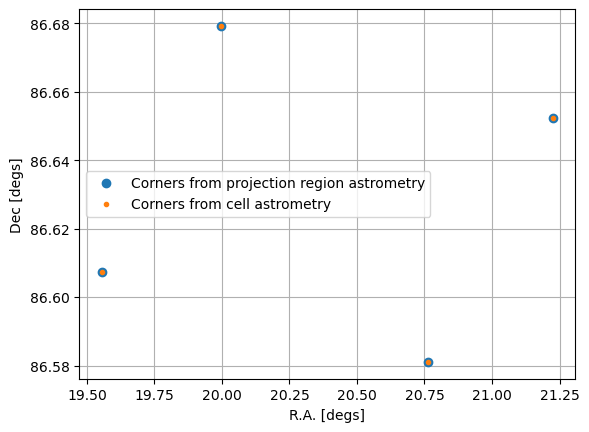

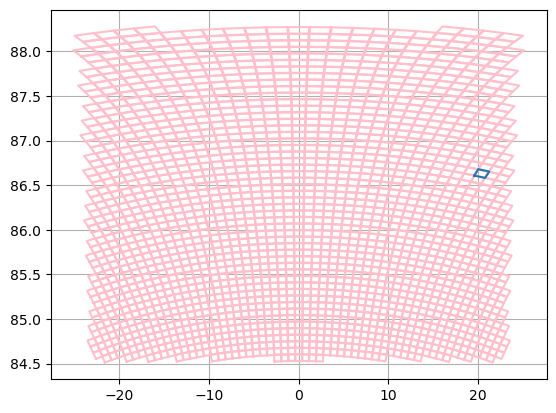

In [6]:
# Graphical representation
import matplotlib.pyplot as plt
plt.plot(ca, cd,'o',label='Corners from projection region astrometry',)
plt.plot( a ,d ,'.',label='Corners from cell astrometry',)
plt.legend()
plt.grid()
plt.xlabel('R.A. [degs]')
plt.ylabel('Dec [degs]')
plt.show()

c0 = tile['ra_tangent']
if c0 == 0:
    for i in range(len(ca)):
        if ca[i] > 270:
            ca[i] -= 360
        if cd[i] > 270:
            cd[i] -= 360

for c in cells:
    ac = c['ra_center']
    dc = c['dec_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    if c0 == 0:
        if c1 > 270:
            c1 -= 360
        if c2 > 270:
            c2 -= 360
        if c3 > 270:
            c3 -= 360
        if c4 > 270:
            c4 -= 360
    plt.plot([c1, c2, c3, c4, c1],
             [d1, d2, d3, d4, d1], color='pink')

ca.append(ca[0])
cd.append(cd[0])
plt.plot(ca,cd)
plt.grid()
plt.show()


# Astrometry of a skycell

In [16]:
from astropy.wcs import WCS
import asdf
import numpy as np


# Reading the file
skymap = asdf.open("skymap.asdf")

# Choose tile and cell
nskytile = 1
nskycell = 1443


tile = skymap['roman']['projection_regions'][nskytile]
cells =  skymap['roman']['skycells'][tile['skycell_start']:tile['skycell_end']]
meta = skymap['roman']['meta']
print('cells ', len(cells))
c = cells[nskycell]

# Compute the WCS of a skycell
ac, dc = tile['ra_tangent'], tile['dec_tangent']
xc, yc = c['x_tangent'], c['y_tangent']
orient = tile['orientat']
pix = meta['pixel_scale']/3600
nxy = skymap['roman']['meta']['nxy_skycell']

wcs = WCS(naxis=2)
wcs.wcs.cdelt = [pix,pix]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs.wcs.crval = [ac, dc]
wcs.wcs.crpix = [xc, yc]
wcs.wcs.crota = [0, orient]  # CROTA2 is the rotation angle
wcs.array_shape = [nxy, nxy]
print(wcs)

cells  2001
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 0.0 86.4008076303 
CRPIX : -40700.5 60099.5 
NAXIS : 5000  5000


# From RA - Dec coords to skycell

In [45]:
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import asdf
import numpy as np
from astropy import units as u

# Reading the file
skymap = asdf.open("skymap.asdf")

# Coordinates [Example]
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')

# Find the skytile
tiles = skymap['roman']['projection_regions']
ramin, ramax = tiles['ra_min'], tiles['ra_max']
decmin, decmax = tiles['dec_min'], tiles['dec_max']

ra, dec = c.ra.deg, c.dec.deg
idtile, = np.where((ra >= ramin) & (ra < ramax) & (dec <= decmax) & (dec > decmin))
print(idtile[0])

# Find the skycell
tile = tiles[idtile[0]]
cells =  skymap['roman']['skycells'][tile['skycell_start']:tile['skycell_end']]
centers = SkyCoord(ra=cells['ra_center']*u.degree, dec=cells['dec_center']*u.degree)
sep = c.separation(centers)
idmin = np.argmin(sep.arcsec)

# Index and name of the cell
print('Index: ', idmin, ' Cell filename :', cells['name'][idmin])

628
Index:  1076  Cell filename : 010p42x52y42


# Using Roman data models

In [47]:
import roman_datamodels as rd
dm = rd.open("skymap.asdf")
type(dm)

roman_datamodels.datamodels._datamodels.SkycellsRefModel

In [50]:
dm.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 4.1.0
├─history (AsdfDictNode)
│ └─extensions (AsdfListNode)
│   ├─0 (ExtensionMetadata) ...
│   ├─1 (ExtensionMetadata) ...
│   └─2 (ExtensionMetadata) ...
└─roman (SkycellsRef) # Skycells Reference File Schema
  ├─meta (AsdfDictNode) # Metadata for Skycells definitions reference file
  │ ├─author (str): Dario Fadda # Author
  │ ├─description (str): Skycells covering the celestial sphere # Description
  │ ├─instrument (AsdfDictNode) ...
  │ ├─nxy_skycell (int): 5000 # Number of pixels in both x and y dimensions
  │ ├─origin (Origin): STSCI # Institution / Organization Name
  │ ├─pedigree (str): GROUND # Pedigree
  │ └─5 not shown
  ├─projection_regions (NDArrayType) # Information about each projection region ...
  ├─skycells (NDArrayType) # Information about all skycells ...
  └─datamodel_name (str): RomanSkyce

In [ ]:
dm.projection_regions          # Access the projection regions
dm.meta.instrument.name        # Access the meta info

### Astrometry of a cell 

In [11]:
from astropy.wcs import WCS
import roman_datamodels as rd

# Reading the tessellation file
skymap = rd.open("skymap.asdf")

# Choose tile and cell
nskytile = 1
nskycell = 1443

tile = skymap.projection_regions[nskytile]
cells =  skymap.skycells[tile['skycell_start']:tile['skycell_end']]
meta = skymap.meta
c = cells[nskycell]

# Compute the WCS of a skycell
ac, dc = tile['ra_tangent'], tile['dec_tangent']
xc, yc = c['x_tangent'], c['y_tangent']
orient = tile['orientat']
pix = meta['pixel_scale']/3600
nxy = skymap.meta.nxy_skycell

wcs = WCS(naxis=2)
wcs.wcs.cdelt = [pix,pix]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs.wcs.crval = [ac, dc]
wcs.wcs.crpix = [xc+1, yc+1]
wcs.wcs.crota = [0, orient]  # CROTA2 is the rotation angle
wcs.array_shape = [nxy, nxy]
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 0.0 86.4008076303 
CRPIX : -74299.5 -26299.5 
NAXIS : 5000  5000


In [12]:
# Recovering the corners of a skycell
x, y = [ -0.5, 4999.5, 4999.5, -0.5], [ -0.5, -0.5, 4999.5, 4999.5]
a, d = wcs.wcs_pix2world(x, y, 0)

ca = [c['ra_corn1'], c['ra_corn2'], c['ra_corn3'], c['ra_corn4']]
cd = [c['dec_corn1'], c['dec_corn2'], c['dec_corn3'], c['dec_corn4']]
x, y = wcs.wcs_world2pix(ca, cd, 0)
for x_,y_ in zip(x, y):
    print('{0:6.1f}, {1:6.1f}'.format(x_,y_))

  -0.5,   -0.5
4999.5,   -0.5
4999.5, 4999.5
  -0.5, 4999.5


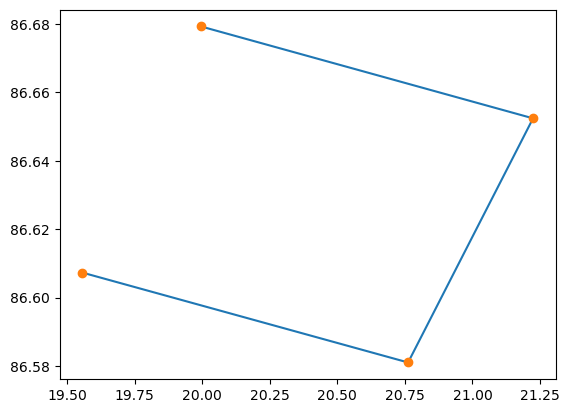

In [13]:
import matplotlib.pyplot as plt
x, y = [ -0.5, 4999.5, 4999.5, -0.5], [ -0.5, -0.5, 4999.5, 4999.5]
a, d = wcs.wcs_pix2world(x, y, 0)
ca = [c['ra_corn1'], c['ra_corn2'], c['ra_corn3'], c['ra_corn4']]
cd = [c['dec_corn1'], c['dec_corn2'], c['dec_corn3'], c['dec_corn4']]

plt.plot(ca, cd)
plt.plot(a, d, 'o')

### From sky coords to cell

In [7]:
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import numpy as np
from astropy import units as u
import roman_datamodels as rd

# Reading the tessellation file
skymap = rd.open("skymap.asdf")

# Sky coordinates [Example]
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')

# Skytile
tiles = skymap.projection_regions
ramin, ramax = tiles['ra_min'], tiles['ra_max']
decmin, decmax = tiles['dec_min'], tiles['dec_max']
ra, dec = c.ra.deg, c.dec.deg
idtile, = np.where((ra >= ramin) & (ra < ramax) & (dec <= decmax) & (dec > decmin))
print('Index tile: ', idtile[0])

# Skycell
tile = tiles[idtile[0]]
cells =  skymap.skycells[tile['skycell_start']:tile['skycell_end']]
centers = SkyCoord(ra=cells['ra_center']*u.degree, dec=cells['dec_center']*u.degree)
sep = c.separation(centers)
idmin = np.argmin(sep.arcsec)

# Index and name of the cell
print('Index cell: ', idmin, '\nSkycell filename :', cells['name'][idmin])

Index tile:  628
Index cell:  1076 
Skycell filename : 010p42x52y42


# Test of gwcs

In [10]:
from astropy.wcs import WCS
import asdf

skymap = asdf.open("skymap.asdf")
nskytile, nskycell = 1, 1443
tile = skymap['roman']['projection_regions'][nskytile]
start, end = tile['skycell_start'], tile['skycell_end']
cell = skymap['roman']['skycells'][start:end][nskycell]
meta = skymap['roman']['meta']
ac, dc = tile['ra_tangent'], tile['dec_tangent']
orient = tile['orientat']
pix = meta['pixel_scale']/3600
nxy = meta['nxy_skycell']

# Astrometry of the skycell 1443, tile 1
wcs = WCS(naxis=2)
wcs.wcs.cdelt = [pix, pix]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs.wcs.crval = [ac, dc]
wcs.wcs.crpix = [cell['x_tangent'], cell['y_tangent']]
wcs.wcs.crota = [0, orient]  # CROTA2 is the rotation angle
wcs.array_shape = [nxy, nxy]

# Astrometry of the projected tile 1
twcs = WCS(naxis=2)
twcs.wcs.cdelt = [pix, pix]
twcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]
twcs.wcs.crval = [ac, dc]
twcs.wcs.crpix = [tile['x_tangent'], tile['y_tangent']]
twcs.wcs.crota = [0, orient]  # CROTA2 is the rotation angle
twcs.array_shape = [tile['nx'], tile['ny']]

x, y = [ -0.5, 4999.5, 4999.5, -0.5], [ -0.5, -0.5, 4999.5, 4999.5]
a, d = wcs.wcs_pix2world(x, y, 0)
print(a, d)

[19.55514844 20.76197263 21.22467389 19.9955799 ] [86.60735149 86.5810776  86.65239676 86.67923565]


In [95]:
import numpy as np
from astropy.modeling import models
from astropy import coordinates as coord
from astropy import units as u
from gwcs import wcs
from gwcs import coordinate_frames as cf

pix = 1/3600.
nxy = 100
x0, y0 = (nxy-1)/2 , (nxy-1)/2 
print('Center of array assuming corner pixel is [0,0]:', x0,y0)
ra0, dec0 = 30,45

# GWCS 
pixelshift = models.Shift(-x0) & models.Shift(-y0)
pixelscale = models.Scale(pix) & models.Scale(pix) # 0.1 arcsec/pixel
tangent_projection = models.Pix2Sky_TAN()
celestial_rotation = models.RotateNative2Celestial(ra0,dec0, 180.)
det2sky = pixelshift | pixelscale | tangent_projection | celestial_rotation
detector_frame = cf.Frame2D(name="detector", axes_names=("x", "y"),unit=(u.pix, u.pix))
sky_frame = cf.CelestialFrame(reference_frame=coord.ICRS(), name='icrs',unit=(u.deg, u.deg))
wcs_gwcs = wcs.WCS([(detector_frame, det2sky),(sky_frame, None)])
w2p = wcs_gwcs.get_transform('icrs','detector')

# ASTROPY
from astropy.wcs import WCS

wcs_astropy = WCS(naxis=2)
wcs_astropy.wcs.cdelt = [pix,pix]
wcs_astropy.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs_astropy.wcs.crval = [ra0,dec0]
wcs_astropy.wcs.crpix = [x0+1,y0+1]  # The WCS assumes FITS convention (1,1) is the center coord of the origin pixel
wcs_astropy.wcs.crota = [0, 0]  # CROTA2 is the rotation angle
wcs_astropy.array_shape = [nxy, nxy]
print(wcs_astropy)

# Check center
print('Central pixel xy for astropy is: ', wcs_astropy.all_world2pix(ra0,dec0,0))
print('Central pixel ra,dec for astropy is: ', wcs_astropy.all_pix2world(x0,y0,0))
print('Central pixel xy for gwcs is: ', w2p(ra0,dec0))
print('Central pixel ra,dec for gwcs is: ', wcs_gwcs(x0,y0))

Center of array assuming corner pixel is [0,0]: 49.5 49.5
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 30.0 45.0 
CRPIX : 50.5 50.5 
NAXIS : 100  100
Central pixel xy for astropy is:  [array(49.5), array(49.5)]
Central pixel ra,dec for astropy is:  [array(30.), array(45.)]
Central pixel xy for gwcs is:  (49.5000000000064, 49.49999999998911)
Central pixel ra,dec for gwcs is:  (29.999999999999993, 45.00000000000001)


In [1]:
from astropy.modeling import models
from astropy import coordinates as coord
from astropy import units as u
from gwcs import wcs
from gwcs import coordinate_frames as cf
import roman_datamodels as rd

nskytile, nskycell = 1, 1443
with rd.open("skymap.asdf") as f:
    tile = f.projection_regions[nskytile]
    start, end = tile['skycell_start'], tile['skycell_end']
    cell = f.skycells[start:end][nskycell]
    meta = f.meta

ra0, dec0 = tile['ra_tangent'], tile['dec_tangent']
pix = meta['pixel_scale']/3600
nxy = meta['nxy_skycell']

# Astrometry of the skycell 1443, tile 1
x0, y0 = cell['x_tangent'], cell['y_tangent']
pixelshift = models.Shift(-x0) & models.Shift(-y0)
pixelscale = models.Scale(pix) & models.Scale(pix) # 0.1 arcsec/pixel
tangent_projection = models.Pix2Sky_TAN()
celestial_rotation = models.RotateNative2Celestial(ra0, dec0, 180.)
det2sky = pixelshift | pixelscale | tangent_projection | celestial_rotation
detector_frame = cf.Frame2D(name="detector", axes_names=("x", "y"),unit=(u.pix, u.pix))
sky_frame = cf.CelestialFrame(reference_frame=coord.ICRS(), name='icrs',unit=(u.deg, u.deg))
wcs_cell = wcs.WCS([(detector_frame, det2sky),(sky_frame, None)])
w2p_cell = wcs_cell.get_transform('icrs','detector')

# Astrometry of the projected tile 1
x0, y0 = tile['x_tangent'], tile['y_tangent']
pixelshift = models.Shift(-x0) & models.Shift(-y0)
pixelscale = models.Scale(pix) & models.Scale(pix) # 0.1 arcsec/pixel
tangent_projection = models.Pix2Sky_TAN()
celestial_rotation = models.RotateNative2Celestial(ra0, dec0, 180.)
det2sky = pixelshift | pixelscale | tangent_projection | celestial_rotation
detector_frame = cf.Frame2D(name="detector", axes_names=("x", "y"),unit=(u.pix, u.pix))
sky_frame = cf.CelestialFrame(reference_frame=coord.ICRS(), name='icrs',unit=(u.deg, u.deg))
wcs_tile = wcs.WCS([(detector_frame, det2sky),(sky_frame, None)])
w2p_tile = wcs_tile.get_transform('icrs','detector')

x, y = [ -0.5, 4999.5, 4999.5, -0.5], [ -0.5, -0.5, 4999.5, 4999.5]
a, d = wcs_cell(x, y)
print(a, d)

[19.554819   20.76164253 21.22433556 19.99524212] [86.6073422  86.58106872 86.65238804 86.67922651]


In [1]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import roman_datamodels as rd
import numpy as np

# Direction coordinates [Example]
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')

# Reading the file
with rd.open("skymap.asdf") as f:
    tiles = f.projection_regions
    skycells = f.skycells

    # Find the skytile
    ramin, ramax = tiles['ra_min'], tiles['ra_max']
    decmin, decmax = tiles['dec_min'], tiles['dec_max']
    ra, dec = c.ra.deg, c.dec.deg
    idtile, = np.where((ra >= ramin) & (ra < ramax) & 
                        (dec <= decmax) & (dec > decmin))
    tile = tiles[idtile[0]]

    # Find the skycell
    start, end = tile['skycell_start'], tile['skycell_end']
    cells =  skycells[start:end]
    
centers = SkyCoord(ra=cells['ra_center']*u.degree, 
                    dec=cells['dec_center']*u.degree, frame='icrs')
sep = c.separation(centers)
idmin = np.argmin(sep.arcsec)

# Index and name of the cell
print('Index: ', idmin, ' Cell filename :', cells['name'][idmin])

Index:  686  Cell filename : 010p42x42y52
